In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from datetime import datetime

In [2]:
# Load Data
file_path = '../data/BrentOilPrices.csv'  
data = pd.read_csv(file_path)

In [3]:
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


### Data Preprocessing

In [5]:
# Convert Date column to datetime format with inferred format
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True, errors='coerce')

data = data.sort_values('Date').reset_index(drop=True)

# Set Date as index for time series analysis
data.set_index('Date', inplace=True)

C:\Users\Getahun\AppData\Local\Temp\ipykernel_17780\634615247.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True, errors='coerce')
C:\Users\Getahun\AppData\Local\Temp\ipykernel_17780\634615247.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True, errors='coerce')


In [6]:
# Check for missing values and fill or drop if necessary
print("Missing values:", data.isnull().sum())
data['Price'] = data['Price'].fillna(method='ffill')  # Forward fill for any missing price data

Missing values: Price    0
dtype: int64


C:\Users\Getahun\AppData\Local\Temp\ipykernel_17780\1915059883.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')  # Forward fill for any missing price data


### Exploratory Data Analysis (EDA)

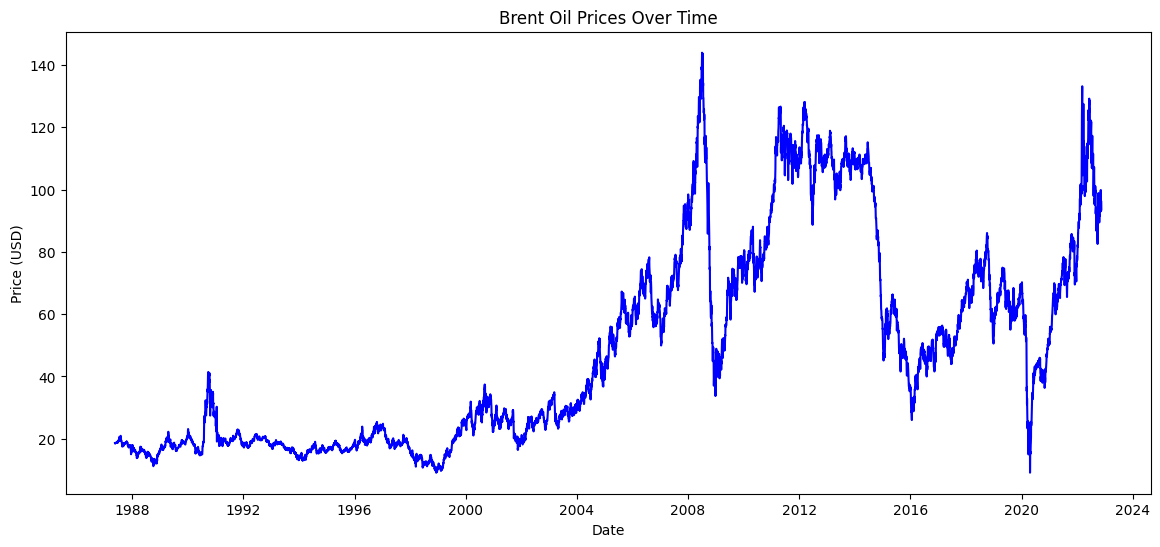

In [7]:
# Plot the time series of Brent oil prices
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Price'], color='blue')
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [8]:
# Calculate daily returns (percentage change)
data['Daily_Return'] = data['Price'].pct_change() * 100
data['Daily_Return'].dropna(inplace=True)

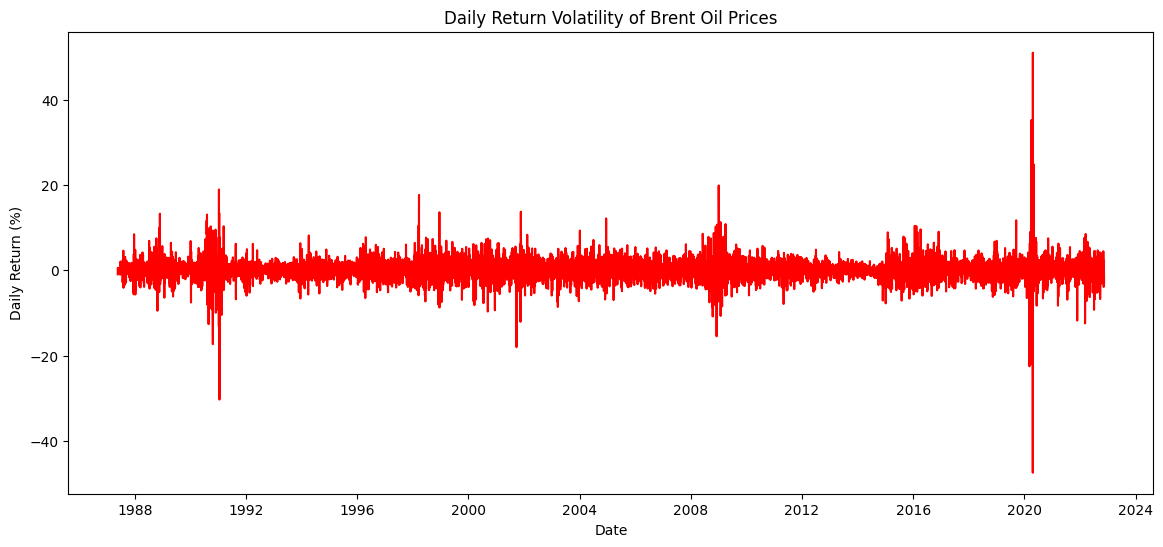

In [10]:
# Plot daily return volatility
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Daily_Return'], color='red')
plt.title("Daily Return Volatility of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.show()

### Identify and mark key events (example of a few events)

In [27]:
# Create a list of significant events from 1987 to 2022
events_data = {
    "1987-05-20": "Brent crude oil first traded on ICE",
    "1989-11-09": "Fall of the Berlin Wall",
    "1990-08-02": "Invasion of Kuwait by Iraq",
    "1991-01-16": "Start of the Gulf War",
    "1991-12-31": "End of the Soviet Union",
    "1997-07-02": "Asian Financial Crisis begins",
    "1998-08-05": "Asian Financial Crisis impacts oil prices",
    "2001-09-11": "Terrorist Attacks on US",
    "2003-03-20": "Invasion of Iraq by US Forces",
    "2004-01-01": "OPEC agrees to production cuts",
    "2005-08-29": "Hurricane Katrina impacts US oil production",
    "2006-07-12": "Israel-Lebanon conflict affects oil prices",
    "2007-10-15": "OPEC maintains production quota",
    "2008-07-11": "Record Oil Prices Hit $147 per Barrel",
    "2008-09-15": "Lehman Brothers collapse, global financial crisis",
    "2009-01-01": "OPEC production cuts continue",
    "2011-02-15": "Libyan Civil War disrupts oil exports",
    "2012-05-18": "Sanctions on Iran impact oil supply",
    "2014-06-24": "Geopolitical tensions in Iraq",
    "2015-11-30": "OPEC agrees to maintain production levels",
    "2016-11-30": "OPEC Agreement to Cut Production",
    "2017-01-20": "Trump inaugurated, affecting energy policies",
    "2019-09-14": "Drone attack on Saudi oil facilities",
    "2020-03-20": "COVID-19 pandemic begins impacting global demand",
    "2020-04-20": "Oil price crash; WTI futures turn negative",
    "2020-11-09": "Pfizer announces COVID-19 vaccine efficacy",
    "2021-07-01": "OPEC+ agrees to gradually increase production",
    "2022-02-24": "Russia invades Ukraine; oil prices spike",
}

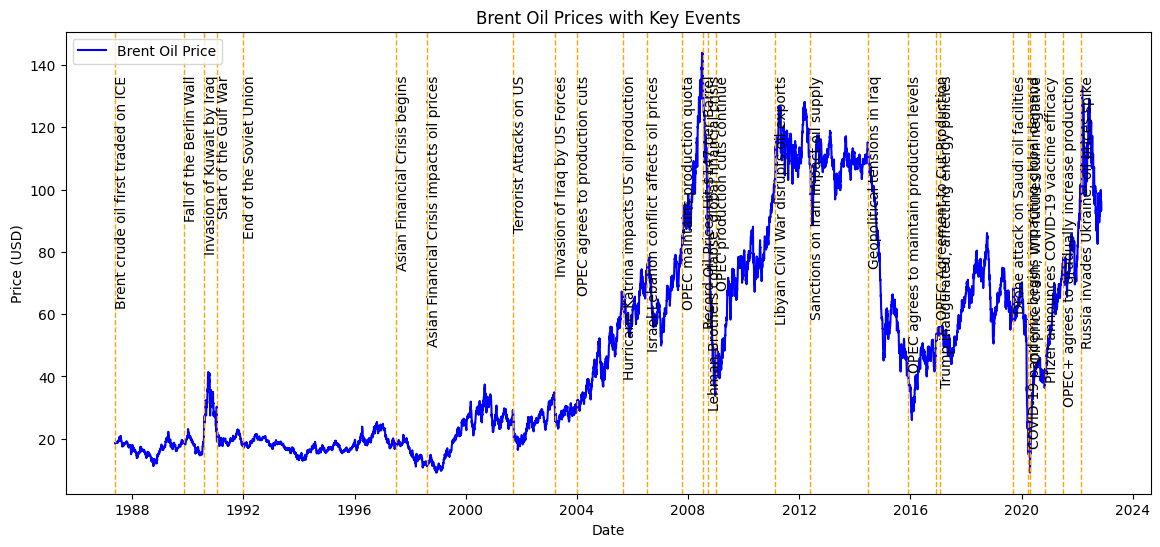

In [28]:
# Plot events on price time series
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Price'], color='blue', label='Brent Oil Price')
for date, label in events_data.items():
    plt.axvline(pd.to_datetime(date), color='orange', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(date), data['Price'].max()*0.95, label, rotation=90, verticalalignment='top')
plt.title("Brent Oil Prices with Key Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

### Time Series Modeling - ARIMA

In [29]:
# ARIMA requires stationary time series, so calculate log returns
data['Log_Returns'] = np.log(data['Price']).diff().dropna()

# Fit ARIMA model
arima_model = ARIMA(data['Log_Returns'].dropna(), order=(1,1,1))
arima_result = arima_model.fit()
print("ARIMA Summary:", arima_result.summary())

e:\Kiffya_10_acc\Week 10\Brent-Oil-Impact-Analysis-and-Price-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Kiffya_10_acc\Week 10\Brent-Oil-Impact-Analysis-and-Price-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Kiffya_10_acc\Week 10\Brent-Oil-Impact-Analysis-and-Price-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Kiffya_10_acc\Week 10\Brent-Oil-Impact-Analysis-and-Price-Forecasting\.venv\

ARIMA Summary:                                SARIMAX Results                                
Dep. Variable:            Log_Returns   No. Observations:                 9010
Model:                 ARIMA(1, 1, 1)   Log Likelihood               20255.180
Date:                Thu, 31 Oct 2024   AIC                         -40504.360
Time:                        11:50:36   BIC                         -40483.042
Sample:                             0   HQIC                        -40497.107
                               - 9010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0138      0.003     -5.289      0.000      -0.019      -0.009
ma.L1         -0.9999      0.008   -118.595      0.000      -1.016      -0.983
sigma2         0.0007   4.97e-06    1

e:\Kiffya_10_acc\Week 10\Brent-Oil-Impact-Analysis-and-Price-Forecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


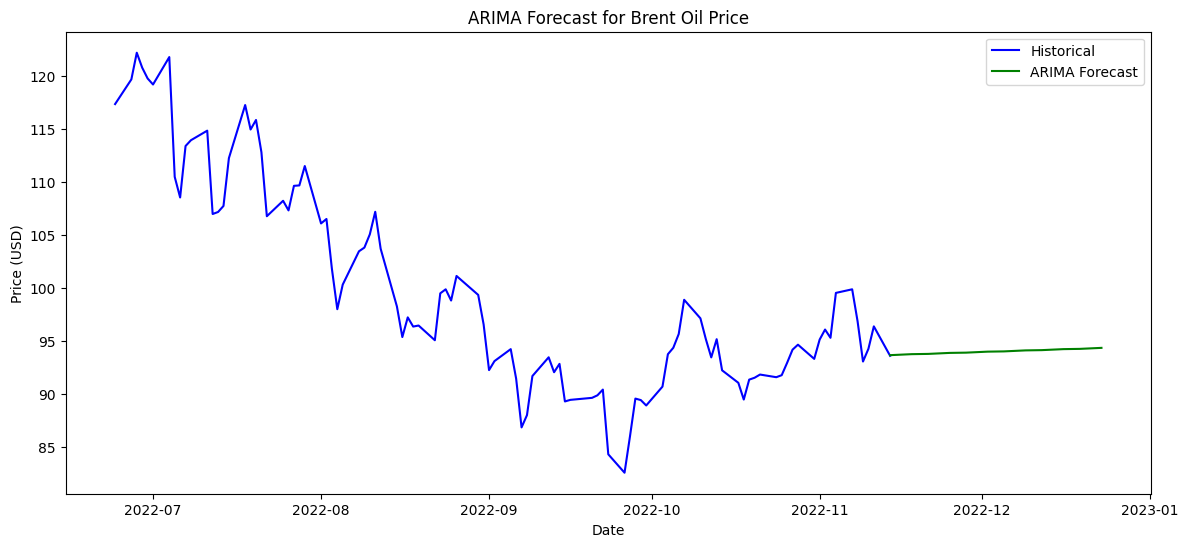

In [31]:
# Forecast future price using ARIMA
arima_forecast = arima_result.forecast(steps=30)
plt.figure(figsize=(14, 6))
plt.plot(data.index[-100:], data['Price'][-100:], color='blue', label='Historical')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='B'), np.exp(arima_forecast.cumsum()) * data['Price'].iloc[-1], color='green', label='ARIMA Forecast')
plt.title("ARIMA Forecast for Brent Oil Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [ ]:
7003964f82c348569f6ecb1648eda530

In [22]:
import requests
import pandas as pd
from datetime import datetime

# Define API parameters
api_key = '7003964f82c348569f6ecb1648eda530'
base_url = 'https://newsapi.org/v2/everything'
keywords = ["OPEC", "oil price", "sanctions", "conflict", "geopolitical"]

def fetch_events(query, from_date, to_date):
    params = {
        'q': query,
        'from': from_date,
        'to': to_date,
        'sortBy': 'relevancy',
        'apiKey': api_key,
        'pageSize': 100  # Maximum allowed per request
    }
    response = requests.get(base_url, params=params)
    
    # Check for valid response
    if response.status_code != 200:
        print(f"Error: {response.status_code} - {response.json().get('message', 'No message')}")
        return []
    
    response_json = response.json()
    
    # Check if articles are in the response
    if 'articles' not in response_json or not response_json['articles']:
        print("No articles found for query:", query)
        return []

    # Parse each article and handle missing fields
    events = []
    for article in response_json['articles']:
        title = article.get('title', 'No Title')
        date = article.get('publishedAt', None)  # Use 'publishedAt' if 'date' doesn't exist
        description = article.get('description', 'No Description')
        
        if date:  # Only add if date exists
            events.append({'title': title, 'date': date, 'description': description})
    
    return events

In [25]:
# Collect events for each keyword over a specified date range
from_date = "2012-01-01"  # Starting date
to_date = "2022-09-30"     # Ending date
all_events = []

for keyword in keywords:
    events = fetch_events(keyword, from_date, to_date)
    all_events.extend(events)

# Convert events to DataFrame if there are any results
if all_events:
    events_df = pd.DataFrame(all_events)
    events_df['date'] = pd.to_datetime(events_df['date'], errors='coerce')
    events_df.sort_values('date', inplace=True)
    # Save to CSV for future reference
    events_df.to_csv("Brent_Oil_Impact_Events.csv", index=False)
    print(events_df.head())
else:
    print("No data found for the specified queries and date range.")

Error: 426 - You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2024-09-29, but you have requested 2012-01-01. You may need to upgrade to a paid plan.
Error: 426 - You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2024-09-29, but you have requested 2012-01-01. You may need to upgrade to a paid plan.
Error: 426 - You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2024-09-29, but you have requested 2012-01-01. You may need to upgrade to a paid plan.
Error: 426 - You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2024-09-29, but you have requested 2012-01-01. You may need to upgrade to a paid plan.
Error: 426 - You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2024-09-29, but you have re